In [1]:
import os
import numpy as np
import pandas as pd
from datetime import datetime
import argparse
import pickle
pd.set_option('display.max_rows', None)
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

plt.style.use('ggplot')
plt.figure(figsize=(12,8), dpi= 100)
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100

<Figure size 1200x800 with 0 Axes>

## Preprocessing

In [2]:
data_dir = "../data/"
datasets = ["compound", "definer", "dydx", "aave", "c_r_e_a_m_-finance"]
dfs = {dataset : pd.read_csv(data_dir+dataset+".csv", index_col=0)  for dataset in datasets}    

print("compound")
dfs["compound"].head()

compound


,lend_rate,borrow_rate
2021-06-27,1.648433,3.184003
2021-06-26,1.678826,3.208434
2021-06-25,1.703638,3.236241
2021-06-24,1.700816,3.245403
2021-06-23,1.727961,3.265837


Correlation between various lending protocols since February (with 7 days rolling avg)

lending rates: 7 days rolling avg


<AxesSubplot:>

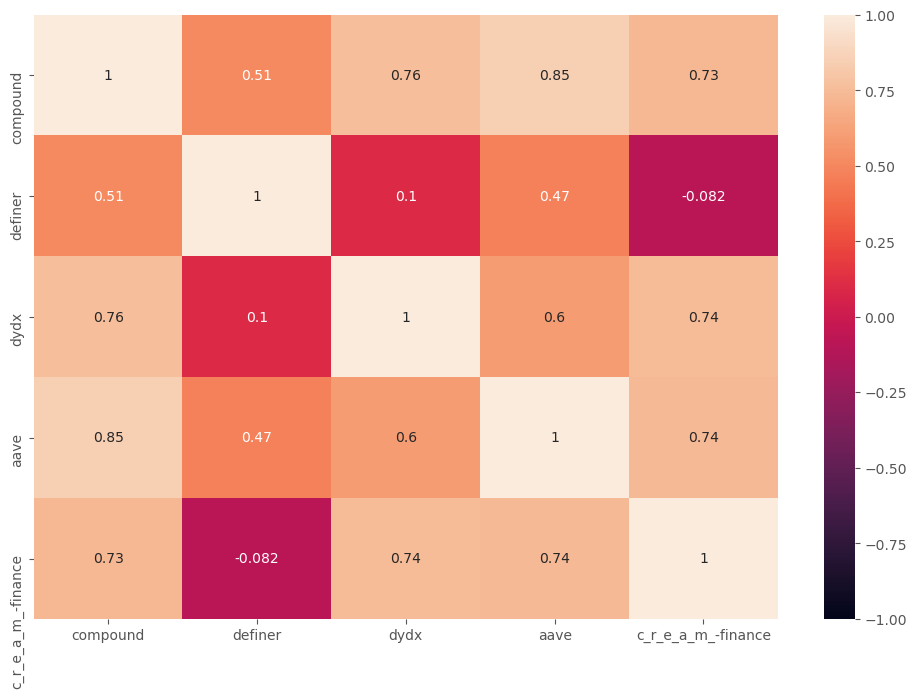

In [3]:
lend_rates_df = None
for name, df in dfs.items():
    df = df.rename(columns={"lend_rate": name})[[name]]
    lend_rates_df = (
        df if lend_rates_df is None
        else pd.merge(lend_rates_df, df, left_index=True, right_index=True, how="inner")
    )

lend_rates_df = lend_rates_df.rolling(7, min_periods=1).mean()    

print("lending rates: 7 days rolling avg")
sns.heatmap(lend_rates_df.corr(), vmin=-1, vmax=1, annot=True)

lending rates: 7 days rolling avg for last 30 days


<AxesSubplot:>

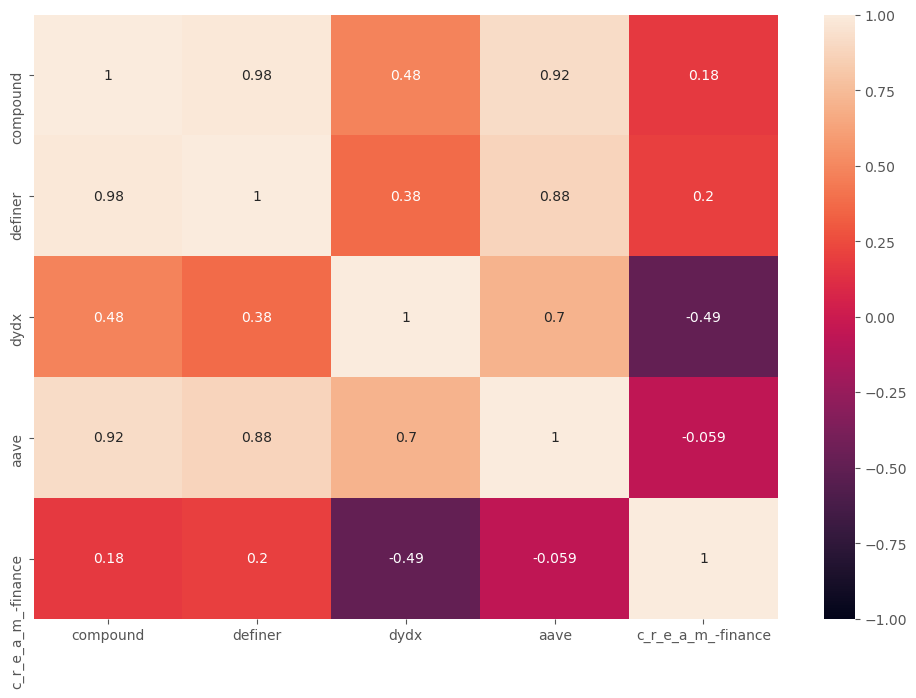

In [6]:
print("lending rates: 7 days rolling avg for last 30 days")
sns.heatmap(lend_rates_df.head(30).corr(), vmin=-1, vmax=1, annot=True)

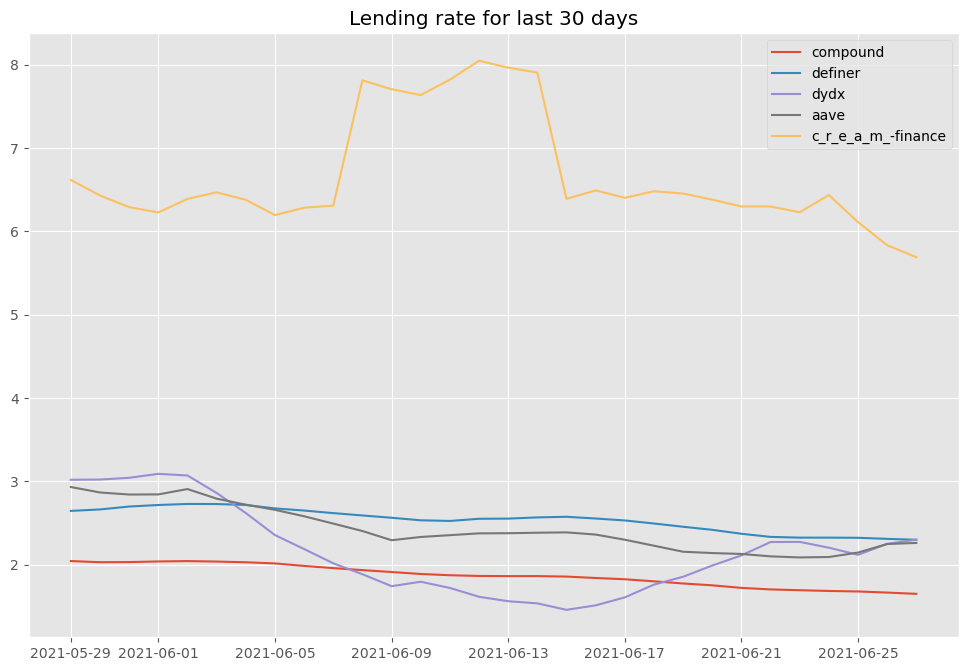

In [7]:
temp_df = lend_rates_df.head(30)
for col in temp_df.columns:
    x_values = [datetime.strptime(d,"%Y-%m-%d").date() for d in temp_df.index]
    y_values = temp_df[col]    
    plt.plot(x_values, y_values, '-', label=col)
plt.legend()
plt.title("Lending rate for last 30 days")
plt.show()

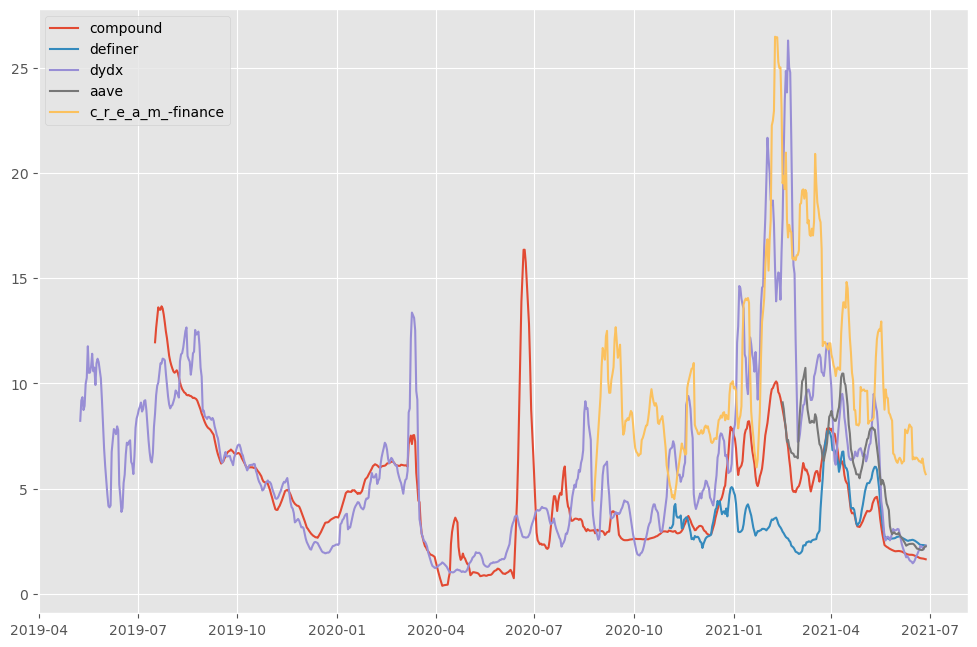

In [8]:
for k, df in dfs.items():
    x_values = [datetime.strptime(d,"%Y-%m-%d").date() for d in df.index]
    y_values = df["lend_rate"].rolling(7, min_periods=1).mean()
    plt.plot(x_values, y_values, '-', label=k)
plt.legend()
plt.show()

In [9]:
lend_rates_df.std()

compound              2.021413
definer               1.712592
dydx                  5.443169
aave                  2.552521
c_r_e_a_m_-finance    4.420350
dtype: float64